# Importing Packages


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import cv2
import glob
import random
import matplotlib.pyplot as plt

<h2> Loading Dataset</h2>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(r"C:\Users\saich\Downloads\major_project (1)\major_project\train set\Train_Validation sets",
target_size=(256,256),batch_size=32,class_mode='binary')
test_set=test_datagen.flow_from_directory(r"C:\Users\saich\Downloads\major_project (1)\major_project\test_data",
target_size=(256,256),batch_size=32,class_mode='binary')

Found 2100 images belonging to 2 classes.
Found 700 images belonging to 2 classes.


In [ ]:
x = plt.imread(r"C:\Users\saich\Downloads\major_project (1)\major_project\test_data\Keratoconus\KCN_7_Sag_P.jpg")
x.shape

(224, 224, 3)

In [ ]:
dir(training_set)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'keep_aspect_ratio',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',

# Output Lables

In [ ]:
print(training_set.class_indices)
eye_dict = {0: "Keratoconus", 1: "Normal"}


{'Keratoconus': 0, 'Normal': 1}


In [ ]:
x, y = training_set.next()
print(x.shape, y.shape)
training_set.reset()

(32, 256, 256, 3) (32,)


# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Set the path to the image directory
img_dir = r'C:\Users\saich\Downloads\major_project (1)\major_project\

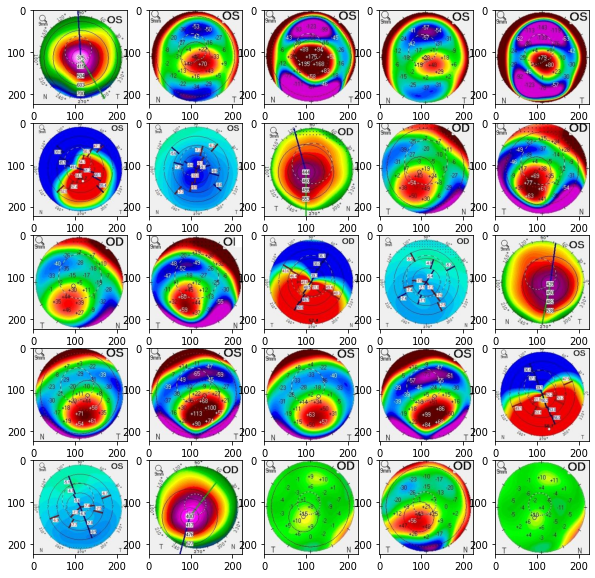

In [ ]:
train set\Train_Validation sets\Keratoconus'

# Get the list of image files
img_files = os.listdir(img_dir)

# Create a figure with 5 rows and 5 columns of subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

# Loop over the subplots and plot the images
for i in range(5):
    for j in range(5):
        # Get the path to the image
        img_path = os.path.join(img_dir, img_files[i*5 + j])

        # Read the image
        img = cv2.imread(img_path)

        # Convert the image to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Plot the image on the axis
        axes[i,j].imshow(img)

# Show the plot
plt.show()

# Heatmap

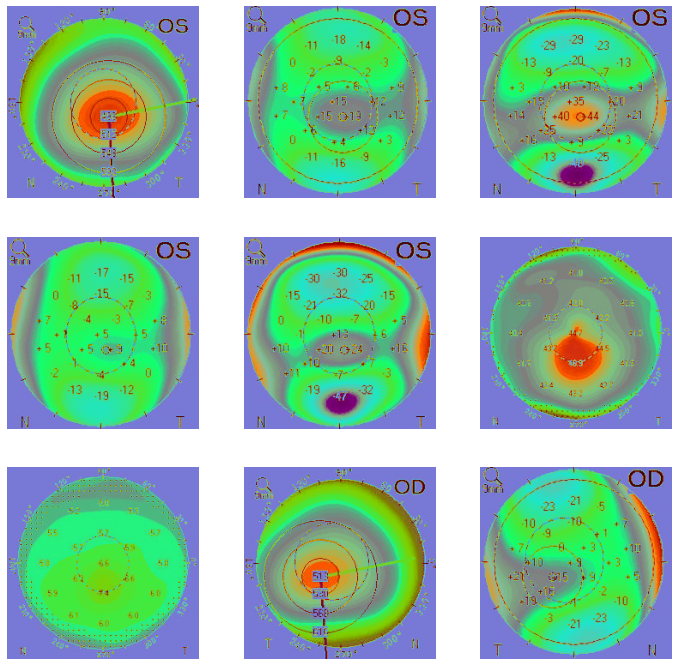

In [ ]:
keratoconus_images = glob.glob(r'C:\Users\saich\Downloads\major_project (1)\major_project\test_data\Keratoconus\*.jpg')

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

#Visualize the keratoconus images with heatmaps
for i in range(3):
    for j in range(3):
        img = cv2.imread(keratoconus_images[i*3+j], cv2.IMREAD_COLOR)
        heatmap = cv2.applyColorMap(img, cv2.COLORMAP_JET)
        axes[i,j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i,j].imshow(heatmap, alpha=0.5)
        axes[i,j].axis('off')



plt.show()

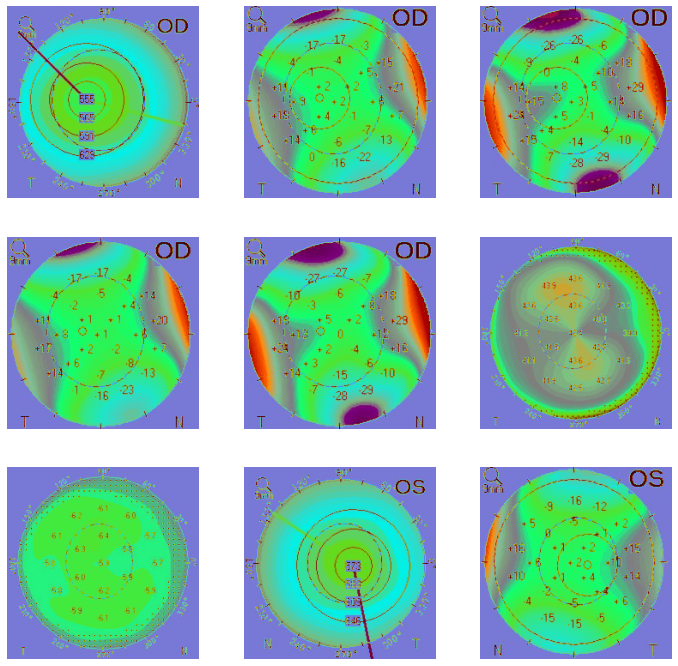

In [ ]:
normal_images = glob.glob(r'C:\Users\saich\Downloads\\major_project (1)\major_project\test_data\Normal\*.jpg')

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

#Visualize the keratoconus images with heatmaps
for i in range(3):
    for j in range(3):
        img = cv2.imread(normal_images[i*3+j], cv2.IMREAD_COLOR)
        heatmap = cv2.applyColorMap(img, cv2.COLORMAP_JET)
        axes[i,j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i,j].imshow(heatmap, alpha=0.5)
        axes[i,j].axis('off')



plt.show()

# Model Building

In [ ]:
model = Sequential()
# buildinf sequentail model
#adding convolutional layer
model.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation='relu'))
#adding maxpool layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#  adding convolutional
model.add(Conv2D(32, (3, 3), activation = 'relu'))
#adding maxpool layer
model.add(MaxPooling2D(pool_size = (2, 2)))
# flatten data in 1 dim
model.add(Flatten())

In [ ]:
import keras
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=1,activation='sigmoid'))
# building classifier using adam optimizer
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

In [ ]:
batch_size=32

In [ ]:
model_fit=model.fit(training_set,steps_per_epoch=455//batch_size,epochs=20,validation_data=test_set,validation_steps=int(30//batch_size))

Epoch 1/20
14/14 [==============================] - 21s 1s/step - loss: 2.5152 - accuracy: 0.6027 - precision: 0.5982 - recall: 0.6036
Epoch 2/20
14/14 [==============================] - 19s 1s/step - loss: 0.3850 - accuracy: 0.8192 - precision: 0.8048 - recall: 0.8086
Epoch 3/20
14/14 [==============================] - 20s 1s/step - loss: 0.2911 - accuracy: 0.8772 - precision: 0.8541 - recall: 0.9045
Epoch 4/20
14/14 [==============================] - 18s 1s/step - loss: 0.2257 - accuracy: 0.9219 - precision: 0.9173 - recall: 0.9433
Epoch 5/20
14/14 [==============================] - 17s 1s/step - loss: 0.1545 - accuracy: 0.9442 - precision: 0.9265 - recall: 0.9701
Epoch 6/20
14/14 [==============================] - 16s 1s/step - loss: 0.1756 - accuracy: 0.9308 - precision: 0.9227 - recall: 0.9272
Epoch 7/20
14/14 [==============================] - 19s 1s/step - loss: 0.1623 - accuracy: 0.9375 - precision: 0.9309 - recall: 0.9395
Epoch 8/20
14/14 [==============================] - 16s

In [ ]:
metrics = model.evaluate(test_set)
print("Accuracy: {:.4f}".format(metrics[1]))

22/22 [==============================] - 5s 221ms/step - loss: 1.0344 - accuracy: 0.8214 - precision: 0.7937 - recall: 0.8686
Accuracy: 0.8214


# Prediction on new image

In [ ]:
print("please provide path of image for classification ")
path=input()

please provide path of image for classification 
C:\Users\saich\Downloads\major_project (1)\major_project\test_data\Normal\NOR_7_EC_A.jpg


In [ ]:
import numpy as np
import cv2
img_=cv2.imread(path)
img_=cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_=cv2.resize(img_,(256,256))
img_batch = np.expand_dims(img_, 0)

In [ ]:

res=model.predict(img_batch)
if res[0][0]==1:
    print("not affected with kertoconus")
else:
    print("affected with keratoconus")

1/1 [==============================] - 0s 81ms/step
not affected with kertoconus
